# Confidence interval , Margin of Error , T tests - 1 Sample, Independent and Paired T Tests

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

<h2> Confidence Interval Calculation and Margin of Error

https://www.youtube.com/playlist?list=PLiC1doDIe9rCYWmH9wIEYEXXaJ4KAi3jc  Tutorials to see for learning
<br> check the Confidence Interval , T Tests, Chi Square from this list


In [263]:
#https://www.kaggle.com/hamelg/python-for-data-analysis-index   
# for learning the process see the stats test in this list

In [3]:
from scipy.stats import norm

In [62]:
stats.poisson.rvs(mu=35, size=2000)

array([30, 39, 37, ..., 35, 35, 36])

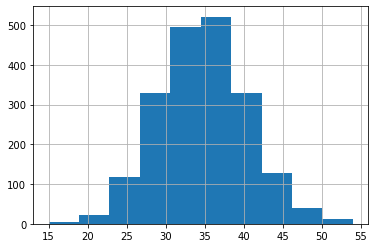

In [5]:
plt.hist(stats.poisson.rvs(mu=35, size=2000))
plt.grid()

In [6]:
p1= stats.poisson.rvs(loc=18, mu=35, size=150000)

In [7]:
p2= stats.poisson.rvs(loc=18, mu=15, size=150000)

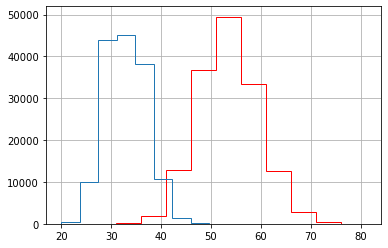

In [8]:
plt.hist(p1,histtype='step', color='red')
plt.hist(p2,histtype='step')
plt.grid()
plt.show()

In [11]:
p_all = np.concatenate((p1,p2))

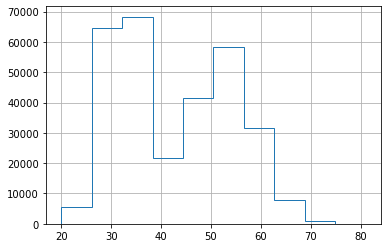

In [10]:
plt.hist(p_all,histtype='step')
plt.grid()

In [12]:
p_all.mean()

43.006676666666664

In [17]:
#create sample from the population

In [13]:
sample_size=100

In [14]:
sample = np.random.choice( a= p_all, size= sample_size)

In [15]:
sample_mean=sample.mean()

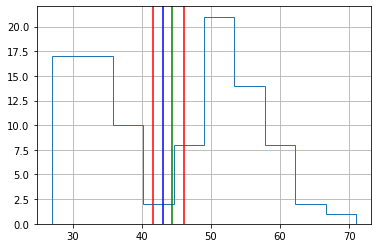

In [16]:
plt.hist(sample,histtype='step')
plt.axvline(sample_mean,c='green')
plt.axvline(p_all.mean(),c='blue')
plt.axvline(41.680636809856836,color='red')
plt.axvline(46.05936319014316,color='red')
plt.grid()


In [18]:
#find out the Z_score

In [26]:
z_score= stats.norm.ppf(q=0.975)

In [27]:
#confidence interval of .05 each side =.025
z_score


1.959963984540054

In [89]:
1-.025

0.975

In [19]:
#find out standard deviation

In [20]:
pop_std=p_all.std()
pop_std

11.179039855407483

In [21]:
p_all.mean()

43.006676666666664

In [22]:
sample_mean=sample.mean()
sample_mean

44.38

In [23]:
# Margin of Error

In [28]:
margin_of_error = z_score * (pop_std/math.sqrt(sample_size))

In [29]:
margin_of_error

2.191051549833652

In [30]:
#calculate Confidence Interval

In [31]:
confidence_interval = (sample_mean - margin_of_error, 
                       sample_mean + margin_of_error,)

In [34]:
confidence_interval

(42.18894845016635, 46.571051549833655)


<br><br><br><br>


<H2> T Test Calculation Basic Example  <br>Independent T Test used here as samples are from different groups
  <br><br>

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [36]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [37]:
g_sales = np.load("germany_sales.npy")

In [38]:
g_sales

array([5255, 6677, 5320, 2747, 4863,  723, 1115,  974,    5, 1495, 1653,
       2050, 2034, 4927, 5708, 6008, 5388, 5264, 2619, 3384, 3008, 1062,
       2279, 2512, 3032, 2750, 3719, 4638, 4558, 3977,  483, 1873, 2220,
       2180, 2946, 1706, 1866, 2635, 2544, 4991, 4604, 5291, 4579, 2183,
       2251, 2375, 3372, 2842, 2075, 2508, 2583, 2877, 5455, 5787, 5845,
       5396, 2636, 2470, 2755, 3443, 3661, 2302, 2541, 2548, 2906])

In [39]:
len(g_sales)

65

In [40]:
f_sales = np.load("france_sales.npy")

In [41]:
f_sales

array([   0,  168,  123,  317,  130,  203,  277,  276,  416,   89,  188,
        703,  109,  215, 1537, 2032, 1674, 1558, 2030, 1838, 1810, 2418,
        124, 1463, 1297, 1169, 1511])

In [42]:
len(f_sales)

27

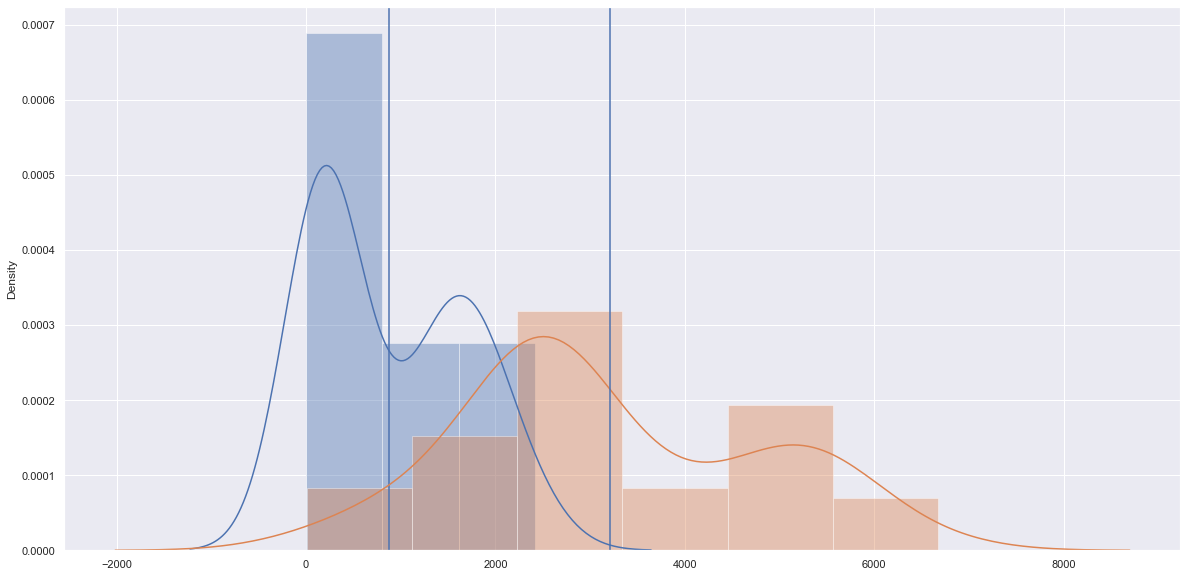

In [43]:
sns.distplot(f_sales)
plt.axvline(f_sales.mean())
sns.distplot(g_sales)
plt.axvline(g_sales.mean())

In [44]:
stat, p = ttest_ind(g_sales, f_sales)

In [47]:
stat, int(p)

(7.401250878526029, 0)

In [46]:
int(p)

0

In [48]:
#use sample data to test again

In [49]:
f_sample = np.random.choice(f_sales, 20)

In [50]:
g_sample = np.random.choice(g_sales, 20)

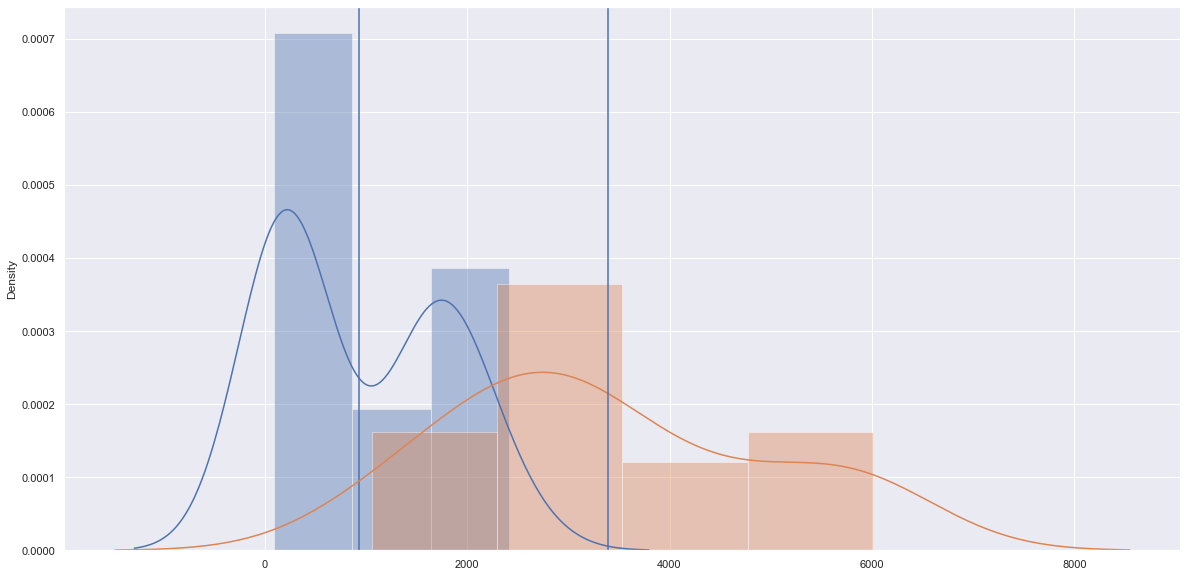

In [51]:
sns.distplot(f_sample)
plt.axvline(f_sample.mean())
sns.distplot(g_sample)
plt.axvline(g_sample.mean())

In [52]:
stat, p = ttest_ind(g_sample, f_sample)

In [53]:
stat, p

(6.2807495187333755, 2.346810515277616e-07)

In [54]:
 print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=6.281, p=0.000


In [55]:
round(p,3)

0.0

<br><br><br><br>
<h2>T Test ( 1 sample T Test) for continous variables when using a Samples in Same Group and checking for distribution against the population<br>
<h4>Independent T Test for testing samples from Different Groups  - T test Independent
    <br>

In [56]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [57]:
np.random.seed(6)

In [58]:
p_age1 = stats.poisson.rvs(loc=18,mu=35, size=20000)

In [59]:
p_age2 = stats.poisson.rvs(loc=18,mu=10, size=10000)

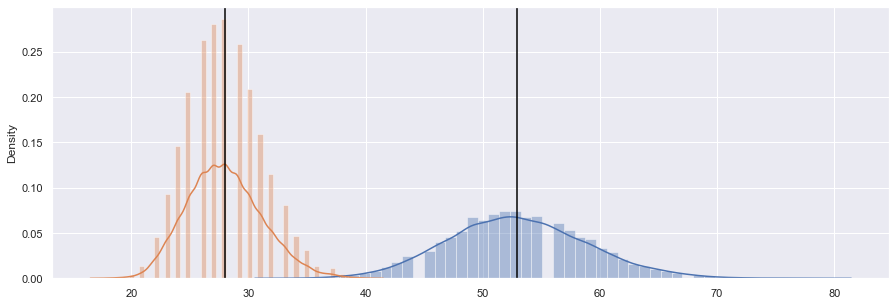

In [61]:
plt.figure(figsize=(15,5))
sns.distplot(p_age1)
sns.distplot(p_age2)
plt.axvline(p_age1.mean(),c='black')
plt.axvline(p_age2.mean(),c='black')

In [62]:
p_all=np.concatenate((p_age1,p_age2))

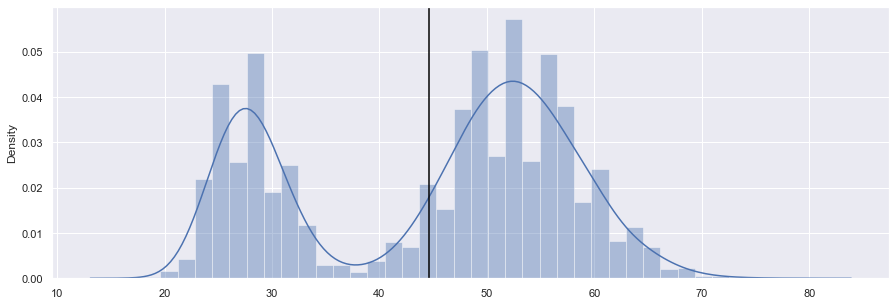

In [64]:
plt.figure(figsize=(15,5))
sns.distplot(p_all)
plt.axvline(p_all.mean(),c='black')

In [65]:
m_age1 = stats.poisson.rvs(loc=18,mu=30, size=30)

In [66]:
m_age2 = stats.poisson.rvs(loc=18,mu=10, size=30)

In [68]:
m_all=np.concatenate((m_age1,m_age2))

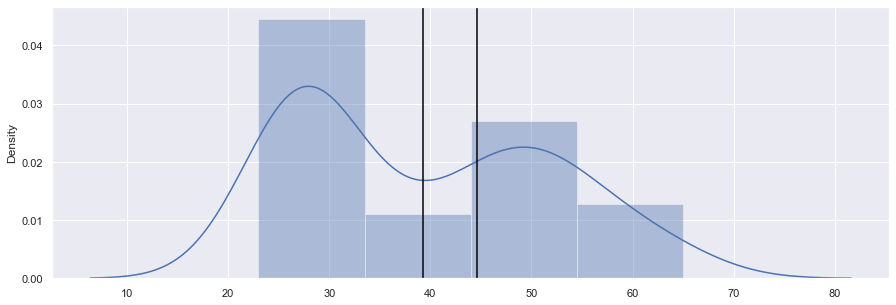

In [70]:
plt.figure(figsize=(15,5))
sns.distplot(m_all)
plt.axvline(p_all.mean(),c='black')
plt.axvline(m_all.mean(),c='black')

In [71]:
p_all.mean(),m_all.mean()

(44.6272, 39.28333333333333)

In [72]:
s, p = stats.ttest_1samp(a=m_all, popmean= p_all.mean())
s,p

(-3.2934040636072255, 0.0016761578780402626)

In [74]:
round(s,3),round(p,3)

(-3.293, 0.002)

In [86]:
int(p)

0

In [75]:
round(s,3)

-3.293

<h2> what does the statistical value mean if you calculate it at 0.025 and 0.0975 the same distribution will fall within these two ranges<br>

In [81]:
# T test is done with samples not greater than 30

In [82]:
#degree of freedom = df is sample size -1

In [80]:
stats.t.ppf(q=0.025, df=29)

-2.0452296421327034

In [79]:
stats.t.ppf(q=0.0975, df=29)

-1.3265801057764681

<h2> We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function:

In [83]:
stats.t.cdf(x=-3.29, df=29)*2

0.00263399594736298

In [84]:
(stats.t.cdf(x=-3.29, df=29)*2)*100

0.263399594736298

In [85]:
#26 percent

<br>
<h2> Confidence Interval and T Test on Transaction Data
  <br><br><br>

In [87]:
bank = pd.read_excel('bank.xlsx')

In [88]:
bank

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1.000000e+06,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2.000000e+06,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2.500000e+06,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5.500000e+06,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6.000000e+06,.
...,...,...,...,...,...,...,...,...,...
116196,409000362497',2019-03-05,TRF TO 1196428 Indiaforensic SE,NaN,2019-03-05,117934.30,NaN,-1.901902e+09,.
116197,409000362497',2019-03-05,FDRL/INTERNAL FUND TRANSFE,NaN,2019-03-05,NaN,300000.0,-1.901602e+09,.
116198,409000362497',2019-03-05,FDRL/INTERNAL FUND TRANSFE,NaN,2019-03-05,NaN,300000.0,-1.901302e+09,.
116199,409000362497',2019-03-05,IMPS 05-03-20194C,NaN,2019-03-05,109868.65,NaN,-1.901412e+09,.


In [64]:
bank['Account No'].unique()

array(["409000611074'", "409000493201'", "409000425051'", "409000405747'",
       "409000438611'", "409000493210'", "409000438620'", "1196711'",
       "1196428'", "409000362497'"], dtype=object)

In [89]:
#Clean up and EDA

In [187]:
bank['Account No'].isna().sum()

0

In [90]:
bank["a"]= pd.Series([i.split("'")[0] for i in bank['Account No']])

In [91]:
"409000611074'".strip("'")

'409000611074'

In [92]:
a=bank.loc[(bank['a']=='409000438620')]

In [93]:
bank.groupby('a')['DEPOSIT AMT'].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
1196428,32092,2130827,6948411,1,110000,313510,949000,211959442
1196711,5511,8324966,13182183,1,2000000,6500000,14900000,500000000
409000362497,14363,7082151,7981170,0,200000,5000000,15000000,200000000
409000405747,23,9947183,41927265,500,69373,250000,1825899,202100000
409000425051,774,34924,557103,1,2000,5000,8000,15000000
409000438611,3255,1445744,3719579,0,79715,727827,1765267,170250000
409000438620,5063,3397676,12643441,0,800,8949,174900,544800000
409000493201,469,203964,134822,0,100000,200000,300000,1000000
409000493210,787,129872,1103416,0,1,107,2051,15000000


In [97]:
# we see that the data is very skewed

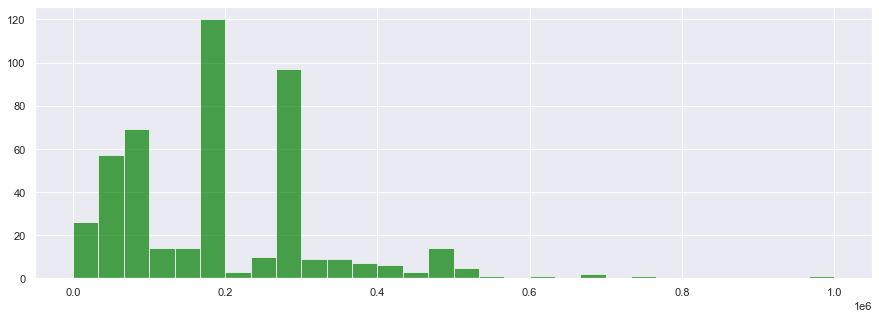

In [102]:
plt.figure(figsize=(15,5))
plt.hist(c['DEPOSIT AMT'].loc[c['a']=="409000493201"].dropna(),bins=30 ,color='green',alpha=0.7)
#plt.hist(c['DEPOSIT AMT'].loc[c['a']=="409000362497"].dropna(),bins=30)
plt.show()

In [95]:
c=bank[['DEPOSIT AMT','DATE',"a"]].sort_values('DATE')

<AxesSubplot:xlabel='DEPOSIT AMT', ylabel='Density'>

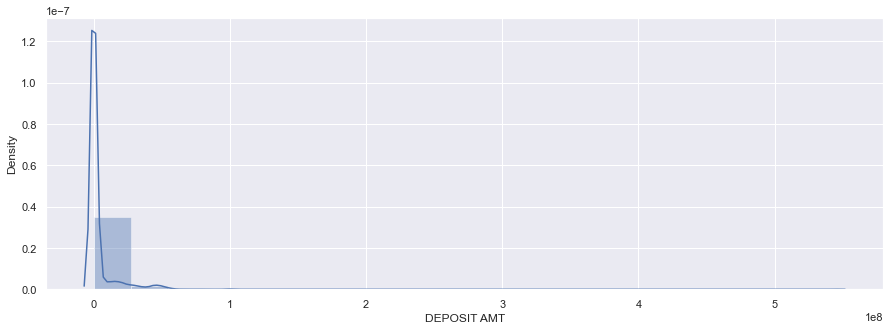

In [103]:
plt.figure(figsize=(15,5))
sns.distplot(a['DEPOSIT AMT'],bins=20)

In [99]:
bank['a'].value_counts()

1196428         48779
409000362497    29840
409000438620    13454
1196711         10536
409000493210     6014
409000438611     4588
409000611074     1093
409000493201     1044
409000425051      802
409000405747       51
Name: a, dtype: int64

In [100]:
bank['Account No'].value_counts()

1196428'         48779
409000362497'    29840
409000438620'    13454
1196711'         10536
409000493210'     6014
409000438611'     4588
409000611074'     1093
409000493201'     1044
409000425051'      802
409000405747'       51
Name: Account No, dtype: int64

In [65]:
bank.columns

Index(['Account No', 'DATE', 'TRANSACTION DETAILS', 'CHQ.NO.', 'VALUE DATE',
       'WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT', '.'],
      dtype='object')

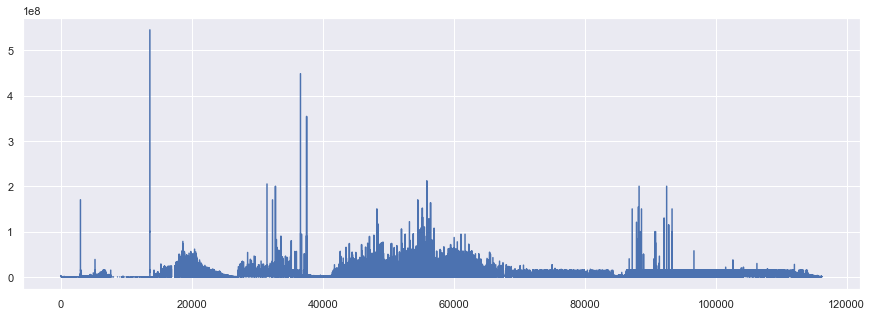

In [104]:
plt.figure(figsize=(15,5))
plt.plot(bank['DEPOSIT AMT'])

In [105]:
bank['DEPOSIT AMT'].max()

544800000.0

In [106]:
bank['DEPOSIT AMT'].mean()

3806585.828441232

In [107]:
bank['DEPOSIT AMT'].min()

0.01

In [108]:
bank['DEPOSIT AMT'].describe().astype(int)

count        62652
mean       3806585
std        8683093
min              0
25%          99000
50%         426500
75%        4746411
max      544800000
Name: DEPOSIT AMT, dtype: int64

In [118]:
#We Take one ac at a time

In [111]:
a =bank.loc[bank['a']=='409000362497']

In [113]:
a.head(2)

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.,a
86361,409000362497',2015-07-16,NaN,NaN,2015-07-16,NaN,10000000.0,-1.677234e+09,.,409000362497
86362,409000362497',2015-07-16,NaN,NaN,2015-07-16,NaN,10000000.0,-1.667234e+09,.,409000362497


<AxesSubplot:xlabel='DEPOSIT AMT', ylabel='Density'>

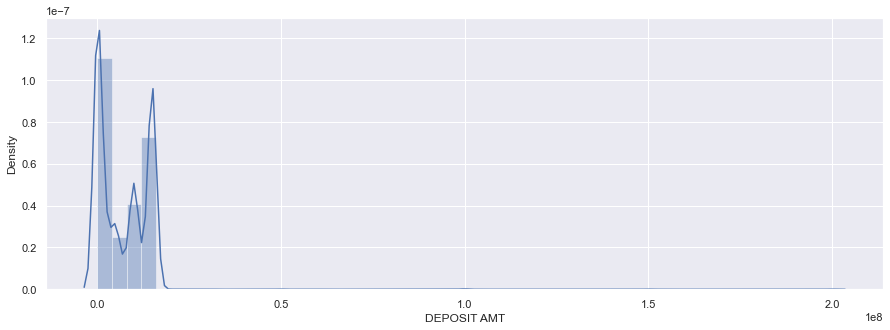

In [116]:
plt.figure(figsize=(15,5))
sns.distplot(a['DEPOSIT AMT'])

In [119]:
#remove extreme values

In [137]:
b =bank.loc[(bank['DEPOSIT AMT']<=5000000)&(bank['DEPOSIT AMT']>=100000)&(bank['a']=='409000362497')]

In [140]:
b.head(2)

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.,a
86386,409000362497',2015-07-17,IMPS I/W 170715 2C,NaN,2015-07-17,NaN,135170.30,-1.606290e+09,.,409000362497
86399,409000362497',2015-07-17,IMPS I/W 170715 3C,NaN,2015-07-17,NaN,145509.58,-1.523111e+09,.,409000362497


In [144]:
# create a DF with just upper limits  b_u

In [127]:
b_u=bank.loc[(bank['DEPOSIT AMT']<=10000000)&(bank['DEPOSIT AMT']>=1000000)]

<AxesSubplot:xlabel='DEPOSIT AMT', ylabel='Density'>

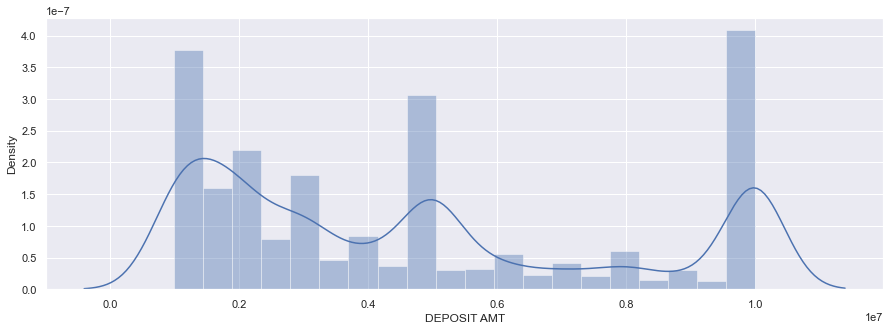

In [128]:
plt.figure(figsize=(15,5))
sns.distplot(b_u['DEPOSIT AMT'],bins=20)

<AxesSubplot:xlabel='DEPOSIT AMT'>

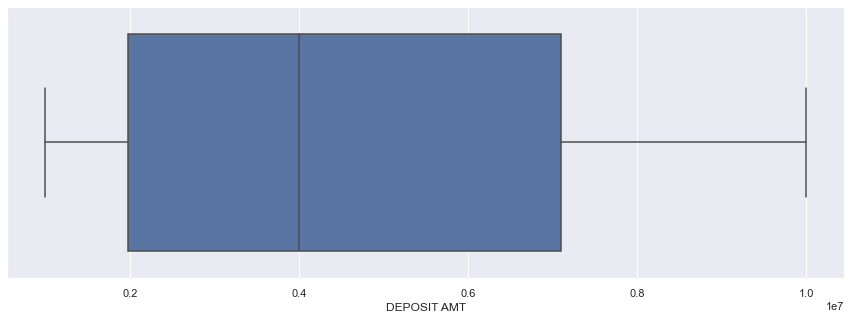

In [129]:
plt.figure(figsize=(15,5))
sns.boxplot(b_u['DEPOSIT AMT'])

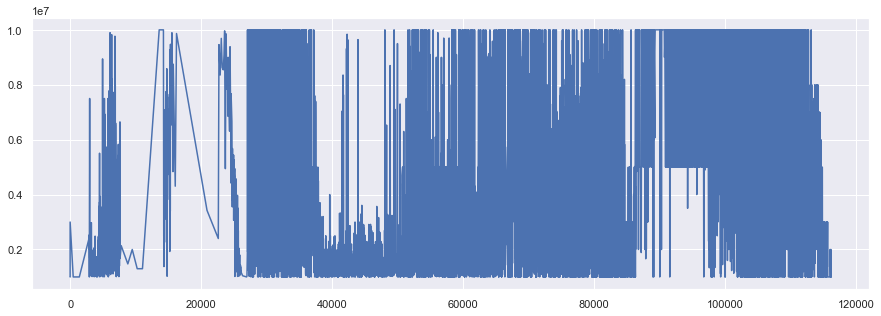

In [131]:
plt.figure(figsize=(15,5))
plt.plot(b_u['DEPOSIT AMT'])
plt.show()

<AxesSubplot:xlabel='DEPOSIT AMT', ylabel='Density'>

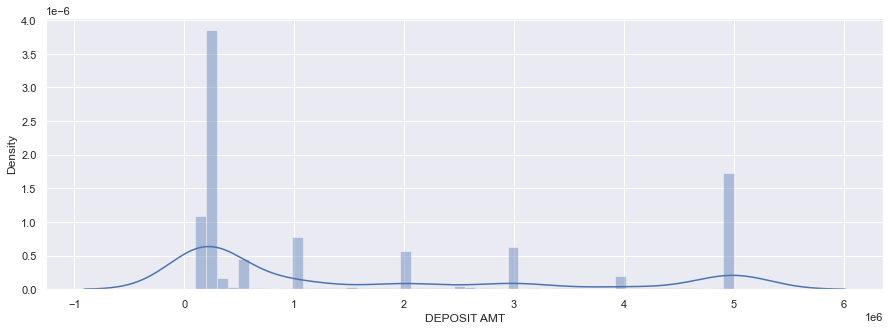

In [145]:
plt.figure(figsize=(15,5))
sns.distplot(b['DEPOSIT AMT'].astype(int),bins=50)

In [148]:
k=bank.loc[(bank['DEPOSIT AMT']<=4800000)]

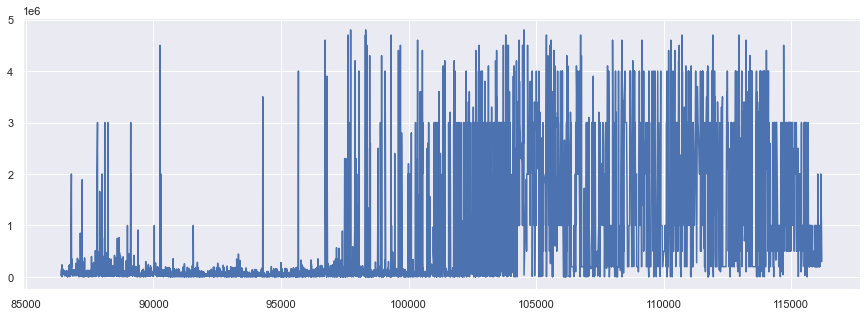

In [150]:

#plt.ticklabel_format(useOffset=False)
plt.figure(figsize=(15,5))
#plt.plot(k['DEPOSIT AMT'].loc[k['a']=='409000611074'].dropna())
plt.plot(k['DEPOSIT AMT'].loc[k['a']=='409000362497'].dropna())
#plt.ylim(bank['DEPOSIT AMT'].min(), bank['DEPOSIT AMT'].max())


<h2> Plot Distribution of 2 Different Accounts and Transactions

<AxesSubplot:xlabel='DEPOSIT AMT', ylabel='Density'>

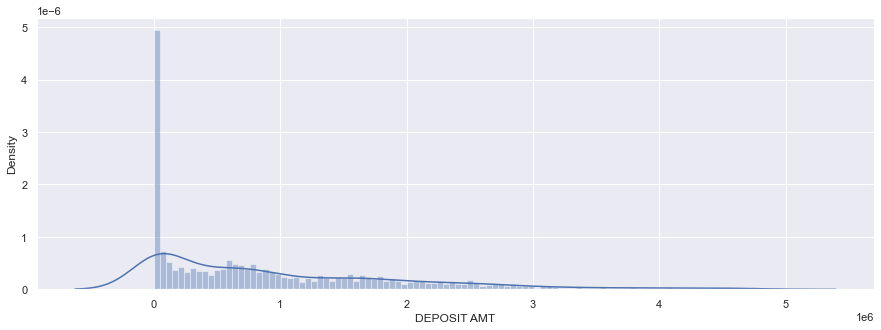

In [154]:
plt.figure(figsize=(15,5))
sns.distplot(k['DEPOSIT AMT'].loc[k['a']=='409000438611'].dropna(),bins=100)

<AxesSubplot:xlabel='DEPOSIT AMT', ylabel='Density'>

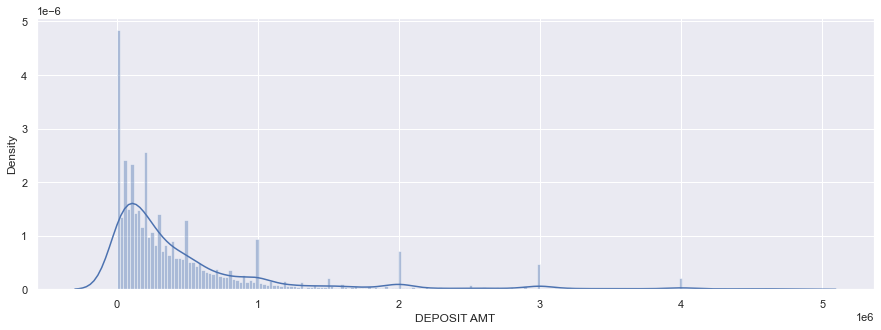

In [153]:
plt.figure(figsize=(15,5))
sns.distplot(k['DEPOSIT AMT'].loc[k['a']=='1196428'].dropna(),bins=200)

In [155]:
k['DEPOSIT AMT'].loc[k['a']=='1196428'].quantile(.05)

11800.0

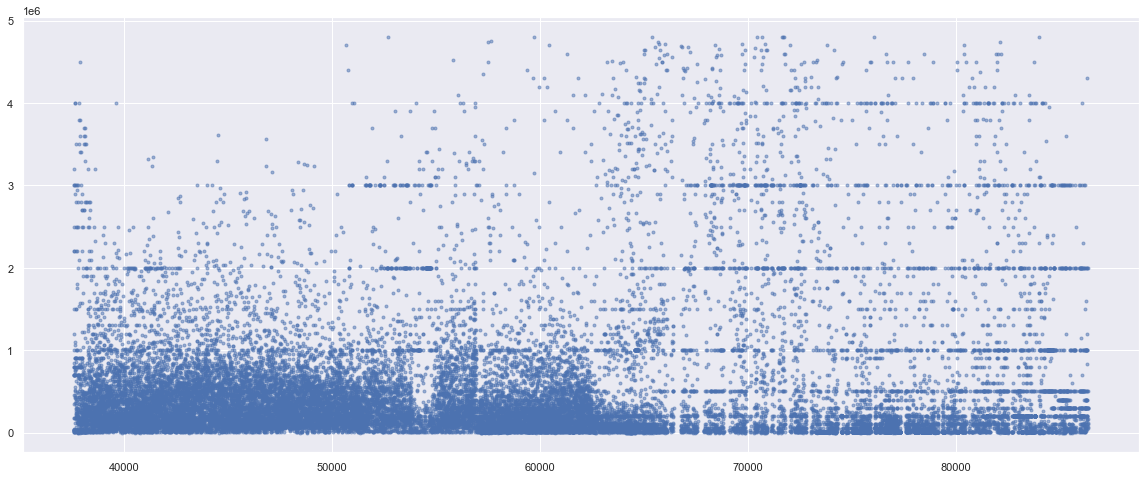

In [156]:
plt.figure(figsize=(20,8))
plt.plot(k['DEPOSIT AMT'].loc[k['a']=='1196428'],'.',alpha=.5)

In [157]:
ac=k['DEPOSIT AMT'].loc[k['a']=='1196428']
ac.shape

(28549,)

In [328]:
ac.describe().astype(int)

count      28549
mean      532416
std       765839
min            1
25%       100000
50%       256000
75%       595000
max      4800000
Name: DEPOSIT AMT, dtype: int64

In [158]:
sample_size=1000

In [159]:
sample=np.random.choice(a=ac, size=sample_size)
sample

array([8.26000000e+03, 2.50000000e+06, 3.76000000e+05, 3.00000000e+05,
       1.88000000e+05, 1.09000000e+05, 1.00000000e+06, 1.14800000e+05,
       4.16000000e+06, 2.00000000e+05, 4.81600000e+04, 5.84000000e+05,
       8.00000000e+03, 3.99900000e+05, 5.50000000e+05, 1.00000000e+05,
       3.15000000e+06, 8.57100000e+05, 2.16000000e+05, 1.53500000e+05,
       6.52000000e+05, 8.00000000e+03, 1.27000000e+05, 4.10000000e+05,
       2.00000000e+06, 3.85450000e+04, 1.18000000e+04, 2.00000000e+05,
       2.00580000e+05, 5.10000000e+04, 1.20000000e+06, 5.70000000e+04,
       5.50500000e+05, 3.03000000e+05, 2.00000000e+05, 1.03500000e+05,
       1.20199000e+05, 3.94000000e+05, 6.87500000e+04, 2.58700000e+05,
       1.65500000e+05, 1.01640494e+06, 2.35500000e+05, 1.00210000e+06,
       4.16000000e+05, 2.68861292e+06, 8.17500000e+04, 1.24000000e+06,
       1.00000000e+06, 1.50000000e+04, 8.00000000e+04, 4.60000000e+06,
       3.00000000e+05, 9.10010000e+05, 2.00000000e+05, 5.35000000e+03,
      

In [161]:
# Checking Confidence Interval of Sample against the account

In [162]:
sample_mean=sample.mean()
sample_mean,ac.mean()

(561943.3974199999, 532416.0398959675)

In [163]:
z_critical = stats.norm.ppf(q = 0.975) 
z_critical

1.959963984540054

In [164]:
pop_stdev = ac.std()
pop_stdev

765839.403219827

In [165]:
margin_of_error = z_critical *(pop_stdev /math.sqrt(sample_size))
margin_of_error

47466.345765873884

In [166]:
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

 <h2> Most Transactions in the account will fall under this Confidence Interval 

In [168]:
confidence_interval

(514477.05165412603, 609409.7431858738)

<h2> With a Margin of Error

In [169]:
margin_of_error

47466.345765873884

In [170]:
# Plot the results visually

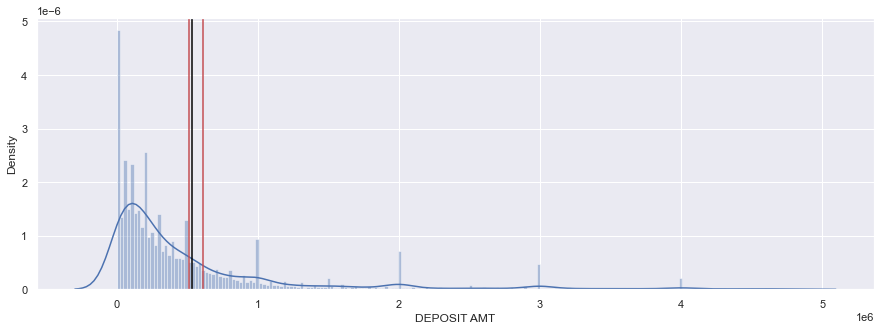

In [172]:
plt.figure(figsize=(15,5))
sns.distplot(k['DEPOSIT AMT'].loc[k['a']=='1196428'].dropna(),bins=200)
plt.axvline(609409.7431858738,c='r')
plt.axvline(514477.05165412603,c='r')
plt.axvline(532416.0398959675,c='black')

<h2> Lets do a T Test to this account information by taking a sample from the Transaction Data

In [179]:
ac2=k['DEPOSIT AMT'].loc[k['a']=='409000438611'].dropna()

In [180]:
ac2=pd.DataFrame(ac2)

<AxesSubplot:xlabel='DEPOSIT AMT', ylabel='Density'>

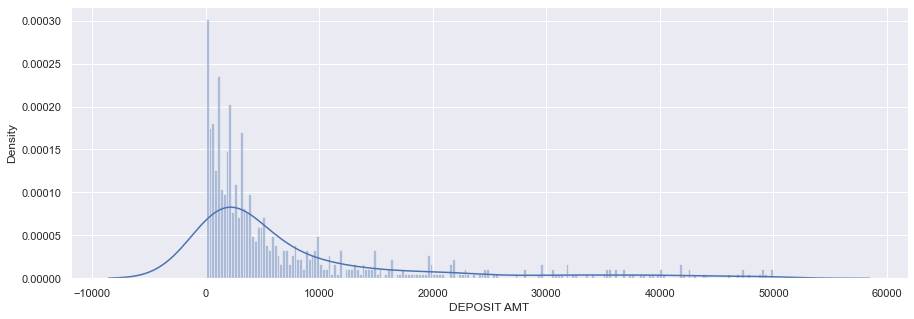

In [181]:
plt.figure(figsize=(15,5))
sns.distplot(ac2['DEPOSIT AMT'].loc[ac2['DEPOSIT AMT']<=50000],bins=200)


In [176]:
ac2.values.reshape(-1,)

array([4.4250000e+01, 2.0881000e+02, 1.1940000e+01, ..., 7.8971382e+05,
       3.8595700e+03, 2.9117091e+05])

In [182]:
sample=np.random.choice(a=ac2.values.reshape(-1,), size=sample_size)


In [183]:
sample.mean(),ac2.mean()

(978072.64596,
 DEPOSIT AMT    973987.897546
 dtype: float64)

In [184]:
s,p = stats.ttest_1samp(a = sample,  #sampledata
                        popmean = ac2.mean())   #pop mean

In [185]:
stats.ttest_1samp(a = sample, popmean = ac2.mean()) 

Ttest_1sampResult(statistic=DEPOSIT AMT    0.127037
dtype: float64, pvalue=array([0.8989368]))

In [186]:
s,p

(DEPOSIT AMT    0.127037
 dtype: float64,
 array([0.8989368]))

In [187]:
p=.89 *100
p

89.0

<h3>89 % time the sample will follow the acoount (pop) distribution

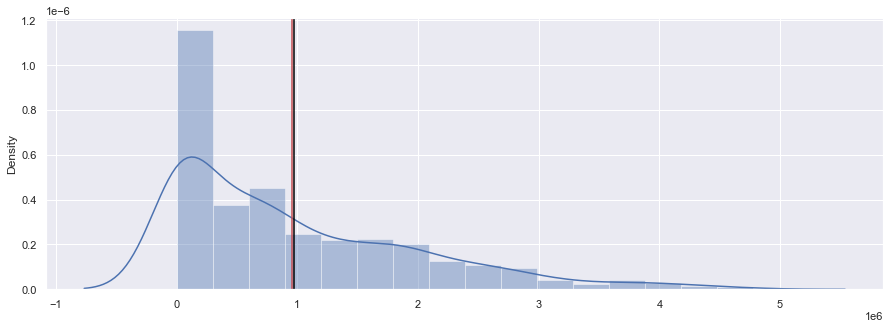

In [190]:
# sample mean and Account mean
plt.figure(figsize=(15,5))
sns.distplot(sample)
plt.axvline(953409.3440899999,c='r')
plt.axvline(973987.897546,c='black')


In [191]:
#Plot Sample and Pop together

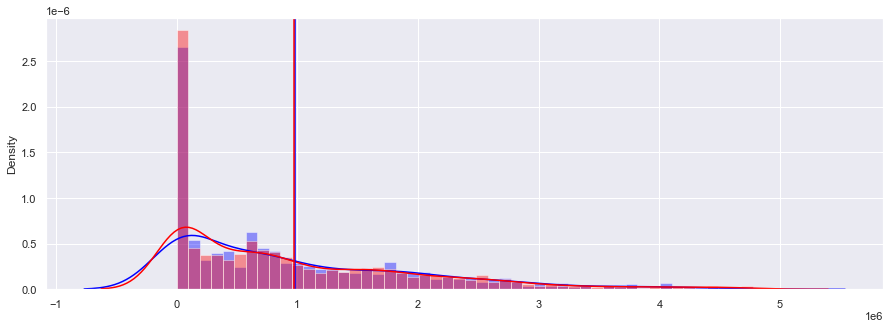

In [192]:
plt.figure(figsize=(15,5))
sns.distplot(sample, hist=True,bins=50,color='blue')
sns.distplot(ac2.values.reshape(-1,), hist=True,bins=50,color='red')
plt.axvline(sample.mean(),c='blue')
plt.axvline(ac2.values.reshape(-1,).mean(),c='red')


In [479]:
k['DEPOSIT AMT'].describe().astype(int)

count      47017
mean      568869
std       891577
min            0
25%        50000
50%       200000
75%       604500
max      4800000
Name: DEPOSIT AMT, dtype: int64

<br><br><br>
<h2>Independent T Test =  samples from 2 different population to see if there are sinilarities

In [193]:
ac

37582    1200000.00
37583     800000.00
37584      15000.00
37585      25000.00
37586      25000.00
            ...    
86354     300000.00
86355     300000.00
86358      56915.00
86359     163462.97
86360      70000.00
Name: DEPOSIT AMT, Length: 28549, dtype: float64

In [194]:
ac.shape

(28549,)

In [195]:
ac2

,DEPOSIT AMT
3023,44.25
3024,208.81
3025,11.94
3026,238.96
3027,331.24
...,...
7570,3743085.84
7571,2099441.11
7572,789713.82
7576,3859.57


In [196]:
stats.ttest_ind(a= ac, b= ac2,equal_var=False)  #equal_var asks id the samples have same variance

Ttest_indResult(statistic=array([-22.88893009]), pvalue=array([4.79480069e-108]))

In [197]:
# p= 0 so it means its very differnt

In [503]:
#try another sample from same pop

In [199]:
pop =ac2.values.reshape(-1)

In [218]:
s1=np.random.choice(pop,30)

In [219]:
s1.mean()

1007325.8926666667

In [220]:
s2=np.random.choice(pop,30)

In [221]:
s2.mean()

1099717.7763333332

In [209]:
# Sincle Samples are from same pop an independent T Test shows wrong results

In [205]:
stats.ttest_ind(a= s1, b= s2,equal_var=False) 

Ttest_indResult(statistic=-1.1967696741736475, pvalue=0.23644288728014481)

In [206]:
pvalue = 0.23644288728014481

In [628]:
statistic= -1.1967696741736475   # because its a independent t test its wrong

In [210]:
# We must use 1 sample T Test

In [222]:
stats.ttest_1samp(a = s1, popmean = pop.mean()) 

Ttest_1sampResult(statistic=0.1834439043546413, pvalue=0.8557263230115977)

In [228]:
stats.ttest_1samp(a = s2, popmean = pop.mean()) 

Ttest_1sampResult(statistic=0.7205645853755428, pvalue=0.47694602913777995)

In [224]:
# P values suggest the distribution is similar at  85 % and 47 %propability falling under same pop distribution

In [214]:
statistic= 0.1834439043546413

In [215]:
statistic= 0.7205645853755428

In [225]:
stats.t.ppf(q=0.095, df= 29)

-1.3420293384940138

In [227]:
stats.t.ppf(q=0.025, df= 29)

-2.0452296421327034

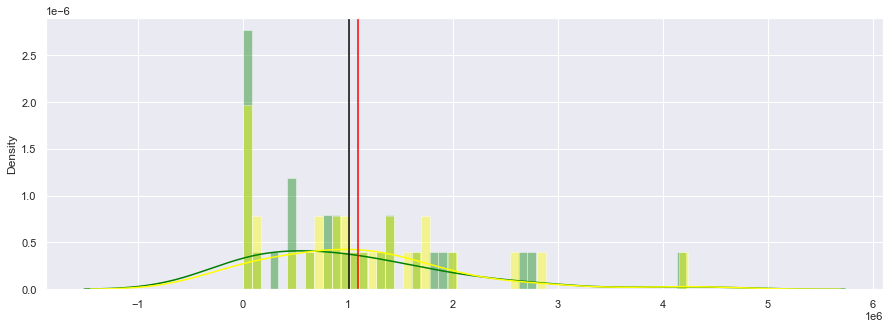

In [229]:
plt.figure(figsize=(15,5))
sns.distplot(s1, hist=True,bins=50,color='green')
sns.distplot(s2, hist=True,bins=50,color='yellow')
plt.axvline(s1.mean(),c='black')
plt.axvline(s2.mean(),c='red')


<H2>Lets check 2 Different Accounts for Independent T Test if there are any similarities

In [230]:
ac2.values.reshape(-1,) ,ac

(array([4.4250000e+01, 2.0881000e+02, 1.1940000e+01, ..., 7.8971382e+05,
        3.8595700e+03, 2.9117091e+05]),
 37582    1200000.00
 37583     800000.00
 37584      15000.00
 37585      25000.00
 37586      25000.00
             ...    
 86354     300000.00
 86355     300000.00
 86358      56915.00
 86359     163462.97
 86360      70000.00
 Name: DEPOSIT AMT, Length: 28549, dtype: float64)

In [234]:
ac1_s=np.random.choice(ac.values.reshape(-1),30)

In [233]:
ac2_s=np.random.choice(ac2.values.reshape(-1),30)

In [235]:
stats.ttest_ind(a= ac1_s, b= ac2_s,equal_var=False) 

Ttest_indResult(statistic=-2.6892053694215945, pvalue=0.01008684816447855)

In [237]:
s,p =stats.ttest_ind(a= ac1_s, b= ac2_s,equal_var=False) 

In [238]:
int(p)

0

In [600]:
# p value is v small means its different

In [239]:
df = ac1_s.shape[0]-1

In [240]:
stats.t.ppf(q=0.025, df= df)

-2.0452296421327034

In [241]:
stats.t.ppf(q=0.0975, df= df)

-1.3265801057764681

In [242]:
s

-2.6892053694215945

In [243]:
statistic = -2.6892053694215945   # is outside the range

In [244]:
# the stat value also do not fall within this range

<H2> Same account

In [572]:
same1_ac=np.random.choice(ac.values.reshape(-1),500)

In [573]:
same2_ac=np.random.choice(ac.values.reshape(-1),500)

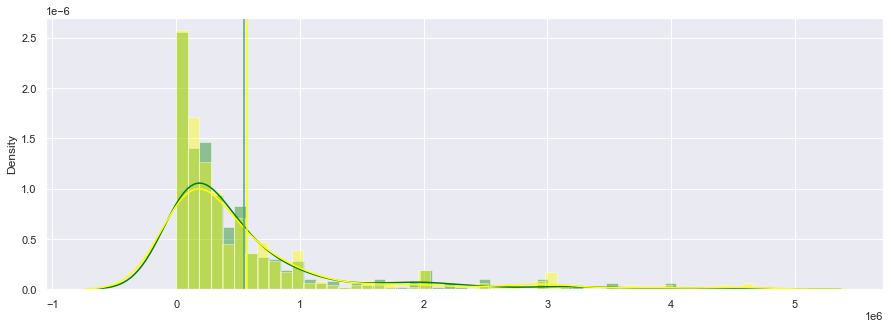

In [575]:
plt.figure(figsize=(15,5))
sns.distplot(same1_ac, hist=True,bins=50,color='green')
sns.distplot(same2_ac, hist=True,bins=50,color='yellow')
plt.axvline(same1_ac.mean(),c='g')
plt.axvline(same2_ac.mean(),c='yellow')

<h2>Same account 1 sample ttest

In [603]:
same1_ac=np.random.choice(ac.values.reshape(-1),30)

In [604]:
same1_ac.mean()

438871.7523333333

In [605]:
ac.mean()

532416.0398959675

In [606]:
stats.ttest_1samp(a = same1_ac, popmean = ac.mean()) 

Ttest_1sampResult(statistic=-0.9539057743714261, pvalue=0.3480154717477456)

In [607]:
pvalue=0.34663011885624237
# it is the same  

In [592]:
# 43% change it will fall in same  0.6591373756057995

In [608]:
same1_ac.shape[0]-1

29

In [581]:
sstatistic= -0.9539057743714261

In [610]:
stats.t.ppf(q=0.025, df= 29)

-2.0452296421327034

In [609]:
stats.t.ppf(q=0.095, df= 29)

-1.3420293384940138

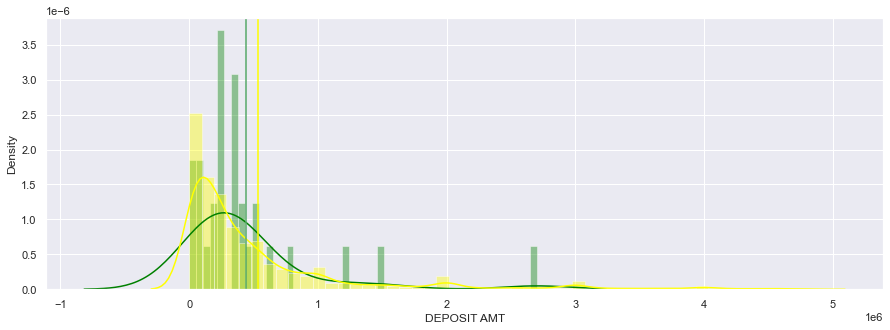

In [611]:
plt.figure(figsize=(15,5))
sns.distplot(same1_ac, hist=True,bins=50,color='green')
sns.distplot(ac, hist=True,bins=50,color='yellow')
plt.axvline(same1_ac.mean(),c='g')
plt.axvline(ac.mean(),c='yellow')

In [602]:
stats.norm.ppf(q = 0.975) 

1.959963984540054

<h2> Paired T Test used in samples of same poplation but at DIFFERENT TIMES , BEFORE and AFTER an event

In [245]:
#we can use before dome date and after some date

In [246]:
bank.head()

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.,a
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,.,409000611074
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2000000.0,.,409000611074
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2500000.0,.,409000611074
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5500000.0,.,409000611074
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6000000.0,.,409000611074


In [247]:
paired_ac1 =bank.loc[bank['a']=='409000611074']

In [248]:
paired_ac1 =paired_ac1.sort_values(by='VALUE DATE')
paired_ac1.head()

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.,a
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,.,409000611074
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2000000.0,.,409000611074
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2500000.0,.,409000611074
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5500000.0,.,409000611074
22,409000611074',2017-08-16,INDO GIBL Indiaforensic STL15071,NaN,2017-08-16,108000.0,NaN,6615037.0,.,409000611074


In [249]:
paired_ac1.shape

(1093, 10)

In [250]:
paired = paired_ac1['DEPOSIT AMT'].dropna()

In [251]:
paired

0       1000000.0
1       1000000.0
2        500000.0
3       3000000.0
4        500000.0
          ...    
1073     500000.0
1076     300000.0
1081     400000.0
1084     300000.0
1089     300000.0
Name: DEPOSIT AMT, Length: 315, dtype: float64

In [252]:
before = paired[:30]
before.shape

(30,)

In [253]:
after = paired[-31:-1]
after.shape

(30,)

In [254]:
stats.ttest_rel(a = before, b = after)

Ttest_relResult(statistic=2.9457028625322534, pvalue=0.006294108730975828)

In [255]:
print ('pvalue = 0.006294108730975828, statistic=2.9457028625322534')

pvalue = 0.006294108730975828, statistic=2.9457028625322534


In [692]:
pvalue = 0.006294108730975828  # less than 0.05 and its very different

In [691]:
statistic=2.9457028625322534 # is not withing the below range and they are very different

In [256]:
stats.t.ppf(q=0.025, df= 29)

-2.0452296421327034

In [257]:
stats.t.ppf(q=0.095, df= 29)

-1.3420293384940138

In [258]:
after.max(),before.max()

(500000.0, 3000000.0)

<AxesSubplot:xlabel='DEPOSIT AMT', ylabel='Density'>

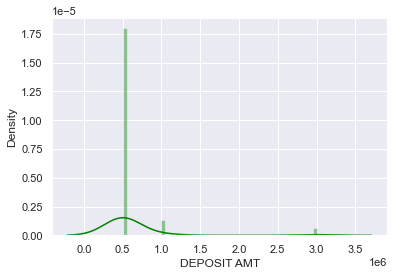

In [259]:
sns.distplot(before, hist=True,bins=50,color='green')

<AxesSubplot:xlabel='DEPOSIT AMT', ylabel='Density'>

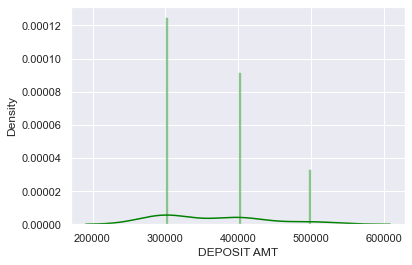

In [260]:
sns.distplot(after, hist=True,bins=50,color='green')

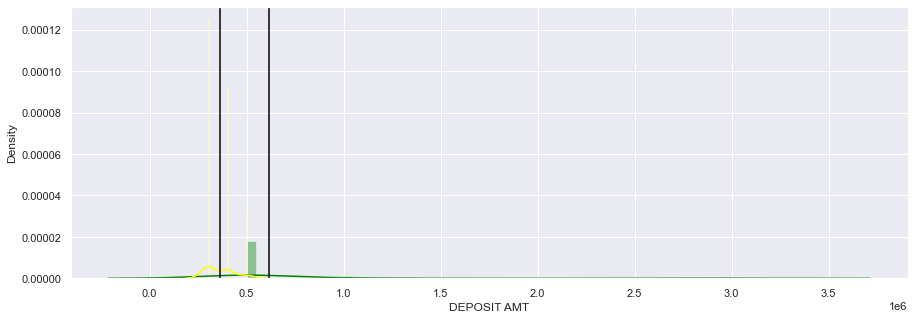

In [261]:
plt.figure(figsize=(15,5))
sns.distplot(before, hist=True,bins=50,color='green')
sns.distplot(after, hist=True,bins=50,color='yellow')
plt.axvline(before.mean(),c='black')
plt.axvline(after.mean(),c='black')

In [267]:
#Learning from here

In [265]:
#https://www.youtube.com/playlist?list=PLiC1doDIe9rCYWmH9wIEYEXXaJ4KAi3jc

In [266]:
#https://www.youtube.com/watch?v=4I2ifomFOec&list=PLiC1doDIe9rCYWmH9wIEYEXXaJ4KAi3jc&index=23

In [264]:
#https://www.youtube.com/watch?v=CIbJSX-biu0&list=PLiC1doDIe9rCYWmH9wIEYEXXaJ4KAi3jc&index=24